In [12]:
from subprocess import check_output
import re
import numpy as np
import pandas as pd
import seaborn as sn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
def run_once(p,max_t,max_cte):
    '''parse the results'''
    
    result  = str(check_output(['./build/pid',str(p[0]),str(p[1]),str(p[2]),str(max_t),str(max_cte)]))
    
    data=[]
    cols=None
    for l in result.split('\\n'):
        if len(l) < 50:
            continue

        a = l.split(' ')
        if cols is None:
            cols = [a[i] for i in range(len(a)) if i%2==0]

        data.append([float(a[i]) for i in range(len(a)) if i%2==1])

    df = pd.DataFrame(data, columns = list(map(lambda x: x.replace(':','').strip(), cols)))
    
    #kick out bogus readings
    return df[df.cte.apply(lambda x: np.abs(x)< 10)]

def score(df):
    return df.cte.mean()

In [ ]:
df = run_once([.115,.02, .09], 1000, 3.0)

In [ ]:
df

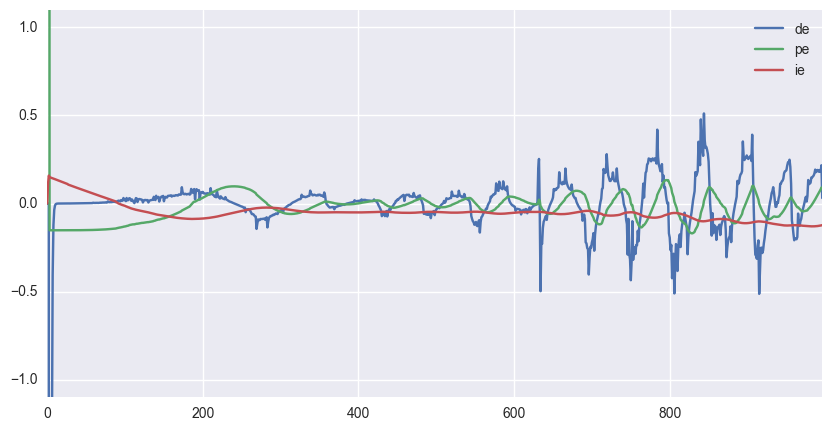

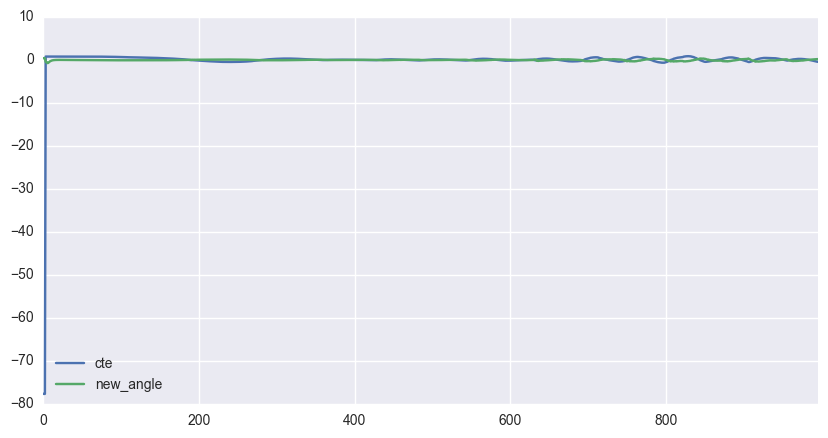

In [14]:
figure(figsize(10,5))
df[['de','pe','ie']].plot()
ylim(-1.1,1.1)

figure(figsize(10,5))
df[['cte','new_angle']].plot()

In [220]:
from scipy.optimize import minimize

In [221]:
#p=[0,  0., 0]
#minimize(zf,p, bounds=[(0,.5)]*3)

In [222]:
def twiddle(tol=.02,n=1): 
    p = [0, 0,0]
    dp = [1, 1,1]
    best_err = error( p,n)

    it = 0
    while sum(dp) > tol:
        print("Iteration {}, best error = {}".format(it, best_err))
        print(dp)
        for i in range(len(p)):
            p[i] += dp[i]
            err = error(p,n)

            if err < best_err:
                best_err = err
                dp[i] *= 1.1
            else:
                p[i] -= 2 * dp[i]
                err = error(p,n)

                if err < best_err:
                    best_err = err
                    dp[i] *= 1.1
                else:
                    p[i] += dp[i]
                    dp[i] *= 0.9
        it += 1
    return p

In [225]:
twiddle(.02)

[0, 0, 0] 3.76925 203.0
Iteration 0, best error = 3.76925
[1, 1, 1]
[1, 0, 0] 0.956681 326.0
[1, 1, 0] 2.81942 365.0
[1, -1, 0] 2.59621 358.0
[1, 0, 1] 0.465628 2240.0
Iteration 1, best error = 0.465628
[1.1, 0.9, 1.1]
[2.1, 0, 1] 0.496188 3001.0
[-0.10000000000000009, 0, 1] 4.23846 606.0
[1.0, 0.9, 1] 1.25405 2413.0
[1.0, -0.9, 1] 2.17603 339.0
[1.0, 0.0, 2.1] 0.25119 3001.0
Iteration 2, best error = 0.25119
[0.9900000000000001, 0.81, 1.2100000000000002]
[1.9900000000000002, 0.0, 2.1] 0.12649 3001.0
[1.9900000000000002, 0.81, 2.1] 0.172091 3001.0
[1.9900000000000002, -0.81, 2.1] 2.73364 436.0
[1.9900000000000002, 0.0, 3.3100000000000005] 0.111074 3001.0
Iteration 3, best error = 0.111074
[1.0890000000000002, 0.7290000000000001, 1.3310000000000004]
[3.0790000000000006, 0.0, 3.3100000000000005] 0.051561 3001.0
[3.0790000000000006, 0.7290000000000001, 3.3100000000000005] 0.0753014 3001.0
[3.0790000000000006, -0.7290000000000001, 3.3100000000000005] 2.7849 613.0
[3.0790000000000006, 0.0, 

KeyboardInterrupt: 